In [3]:
# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook briefly demonstrates how to gather relevant datasets for surface material analysis in the Keep River area. The outputs will be geotiffs that can be opened in GIS software for spatial analysis.

In [4]:
%pylab notebook
#%pylab inline
#%matplotlib inline
import datacube
import xarray as xr
from datacube.storage import masking
from datacube.storage.masking import mask_to_dict
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.dates
import json
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
import fiona
import shapely
import shapely.geometry
from shapely.geometry import shape
import rasterio


Populating the interactive namespace from numpy and matplotlib


If you have set up your config correctly, or are using the module on NCI, you should be able to make `Datacube` object that can connects to the configured datacube system.

In [5]:
dc = datacube.Datacube(app='dc-example')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://njs547@130.56.244.227:6432/datacube)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [6]:
dc.list_products()

name  \
id                                 
36            bom_rainfall_grids   
32                      dsm1sv10   
53                     gamma_ray   
42                 ls5_fc_albers   
2               ls5_level1_scene   
6                ls5_nbar_albers   
3                 ls5_nbar_scene   
26              ls5_nbart_albers   
4                ls5_nbart_scene   
41               ls5_ndvi_albers   
23                 ls5_pq_albers   
5                   ls5_pq_scene   
1   ls5_satellite_telemetry_data   
44                 ls7_fc_albers   
9               ls7_level1_scene   
21               ls7_nbar_albers   
10                ls7_nbar_scene   
29              ls7_nbart_albers   
11               ls7_nbart_scene   
45               ls7_ndvi_albers   
22                 ls7_pq_albers   
12                  ls7_pq_scene   
8   ls7_satellite_telemetry_data   
47                 ls8_fc_albers   
40          ls8_level1_oli_scene   
14              ls8_level1_scene   
19               ls8_nbar_albers   
60           ls8_nbar_oli_albers   
57            ls8_nbar_oli_scene   
15                ls8_nbar_scene   
28              ls8_nbart_albers   
61          ls8_nbart_oli_albers   
58           ls8_nbart_oli_scene   
16               ls8_nbart_scene   
55               ls8_ndvi_albers   
20                 ls8_pq_albers   
59              ls8_pq_oli_scene   
17                  ls8_pq_scene   
13  ls8_satellite_telemetry_data   
49            modis_mcd43a1_tile   
50            modis_mcd43a2_tile   
51            modis_mcd43a3_tile   
52            modis_mcd43a4_tile   
56                srtm_dem1sv1_0   
46                   wofs_albers   

                                          description  \
id                                                      
36  Interpolated Rain Gauge Precipitation 1-Day Au...   
32                               DSM 1sec Version 1.0   
53  The 2015 radiometric or gamma-ray grid of Aust...   
42  Landsat 5 Fractional Cover 25 metre, 100km til...   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...   
3                             Landsat 5 NBAR 25 metre   
26  Landsat 5 Surface Reflectance NBART 25 metre, ...   
4                            Landsat 5 NBART 25 metre   
41  Landsat 5 Normalised Difference Vegetation Ind...   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...   
5                               Landsat 5 PQ 25 metre   
1                  Landsat 5 Satellite Telemetry Data   
44  Landsat 7 Fractional Cover 25 metre, 100km til...   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...   
10                            Landsat 7 NBAR 25 metre   
29  Landsat 7 Surface Reflectance NBART 25 metre, ...   
11                           Landsat 7 NBART 25 metre   
45  Landsat 7 Normalised Difference Vegetation Ind...   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...   
12                              Landsat 7 PQ 25 metre   
8                  Landsat 7 Satellite Telemetry Data   
47  Landsat 8 Fractional Cover 25 metre, 100km til...   
40  Landsat 8 OLI Level 1 At-sensor Radiance 25 metre   
14  Landsat 8 Level 1 OLI-TIRS At-sensor Radiance ...   
19  Landsat 8 Surface Reflectance NBAR 25 metre, 1...   
60  Landsat 8 Surface Reflectance NBAR 25 metre, 1...   
57                        Landsat 8 OLI NBAR 25 metre   
15                            Landsat 8 NBAR 25 metre   
28  Landsat 8 Surface Relfectance NBART 25 metre, ...   
61  Landsat 8 Surface Relfectance NBART 25 metre, ...   
58                       Landsat 8 OLI NBART 25 metre   
16                           Landsat 8 NBART 25 metre   
55  Landsat 8 Normalised Difference Vegetation Ind...   
20  Landsat 8 Pixel Quality 25 metre, 100km tile, ...   
59                          Landsat 8 OLI PQ 25 metre   
17                              Landsat 8 PQ 25 metre   
13                 Landsat 8 Satellite Telemetry Data  

## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [5]:
dc.list_measurements()

aliases  \
product            measurement                                                     
bom_rainfall_grids rainfall                                                  NaN   
dsm1sv10           elevation                                                 NaN   
gamma_ray          rad_air_dose_rate_unfiltered                              NaN   
                   rad_k_equiv_conc_unfiltered                               NaN   
                   rad_u_equiv_conc_unfiltered                               NaN   
                   rad_th_equiv_conc_unfiltered                              NaN   
                   rad_air_dose_rate_filtered                                NaN   
                   rad_k_equiv_conc_filtered                                 NaN   
                   rad_u_equiv_conc_filtered                                 NaN   
                   rad_th_equiv_conc_filtered                                NaN   
                   rad_ratio_tk                                              NaN   
                   rad_ratio_u2t                                             NaN   
                   rad_ratio_uk                                              NaN   
                   rad_ratio_ut                                              NaN   
ls5_fc_albers      BS                                                     [bare]   
                   PV                                                [green_veg]   
                   NPV                                                [dead_veg]   
                   UE                                                      [err]   
ls5_nbar_albers    blue                                           [band_1, blue]   
                   green                                         [band_2, green]   
                   red                                             [band_3, red]   
                   nir                                             [band_4, nir]   
                   swir1                                         [band_5, swir1]   
                   swir2                                         [band_7, swir2]   
ls5_nbar_scene     1                                              [band_1, blue]   
                   2                                             [band_2, green]   
                   3                                               [band_3, red]   
                   4                                               [band_4, nir]   
                   5                                             [band_5, swir1]   
                   7                                             [band_7, swir2]   
...                                                                          ...   
modis_mcd43a3_tile Albedo_WSA_nir                                            NaN   
                   Albedo_WSA_shortwave                                      NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band3                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band4                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band5                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band6                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band7                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_nir                    NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_shortwave              NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_vis                    NaN   
modis_mcd43a4_tile BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                   BRDF_Albedo_Band_Mandatory_Quality_Band3                  NaN   
                   BRDF_Albedo_Band_Manda

In [6]:
#Define a dictionary for months

monthDict={'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8,
           'October':9, 'November':10, 'December':11}

def geom_query(geom, geom_crs='EPSG:28352'):
    """
    Create datacube query snippet for geometry
    """
    return {
        'x': (geom.bounds[0], geom.bounds[2]),
        'y': (geom.bounds[1], geom.bounds[3]),
        'crs': geom_crs
    }


def warp_geometry(geom, crs_crs, dst_crs):
    """
    warp geometry from crs_crs to dst_crs
    """
    return shapely.geometry.shape(rasterio.warp.transform_geom(crs_crs, dst_crs, shapely.geometry.mapping(geom)))


def transect(data, geom, resolution, method='nearest', tolerance=None):
    """
    
    """
    dist = [i for i in range(0, int(geom.length), resolution)]
    points = zip(*[geom.interpolate(d).coords[0] for d in dist])
    indexers = {
        data.crs.dimensions[0]: list(points[1]),
        data.crs.dimensions[1]: list(points[0])        
    }
    return data.sel_points(xr.DataArray(dist, name='distance', dims=['distance']),
                           method=method,
                           tolerance=tolerance,
                           **indexers)

In [7]:
#### DEFINE SPATIOTEMPORAL RANGE AND BANDS OF INTEREST
#Use this to manually define an upper left/lower right coords
#Either as polygon or as lat/lon range

#NOTE: For some odd reason the shapefile is being read in as being in projected coordinates (EPSG:28532) which causes an 
# error

vec_fname = '/home/547/njs547/shapefiles/aoi_ll.shp' #comment these lines out if running without polygon
src = fiona.open(vec_fname)
geom = shape(src[0]['geometry'])




#Define temporal range
start_of_epoch = '2010-01-01'
#need a variable here that defines a rolling 'latest observation'
end_of_epoch =  '2016-12-31'

#Define wavelengths/bands of interest, remove this kwarg to retrieve all bands
bands_of_interest = ['blue',
                     'green',
                     'red', 
                     'nir',
                     'swir1', 
                     'swir2'
                     ]

#Define sensors of interest
sensor1 = 'ls8'
sensor2 = 'ls7'
sensor3 = 'ls5'

query = {
    'time': (start_of_epoch, end_of_epoch),
}

#query.update(geom_query(geom)) #comment this out if not using a polygon

#If not using a polygon/polyline, enter lat/lon here manually
lat_max = -14.855414
lat_min = -14.981805
lon_max = 128.722390
lon_min = 128.576150
query['x'] = (lon_min, lon_max)
query['y'] = (lat_max, lat_min)

#This accounts for the fact that the shapefile is being incorrectly read
query['crs'] = 'EPSG:4326'


In [8]:
print query

{'y': (-14.855414, -14.981805), 'x': (128.57615, 128.72239), 'crs': 'EPSG:4326', 'time': ('2010-01-01', '2016-12-31')}


## Retrieve surface reflectance data


In [9]:
#Group PQ by solar day to avoid idiosyncracies of N/S overlap differences in PQ algorithm performance
pq_albers_product = dc.index.products.get_by_name(sensor1+'_pq_albers')
valid_bit = pq_albers_product.measurements['pixelquality']['flags_definition']['contiguous']['bits']

def pq_fuser(dest, src):
    valid_val = (1 << valid_bit)

    no_data_dest_mask = ~(dest & valid_val).astype(bool)
    np.copyto(dest, src, where=no_data_dest_mask)

    both_data_mask = (valid_val & dest & src).astype(bool)
    np.copyto(dest, src & dest, where=both_data_mask)

In [10]:
#load sensor specific band adjustment tuples for TSS and brightness
brightness_coeff = {}
brightness_coeff['ls5'] = (0.304, 0.279, 0.434, 0.559, 0.508, 0.186)
brightness_coeff['ls7'] = (0.304, 0.279, 0.434, 0.559, 0.508, 0.186)
#brightness_coeff['ls7'] = (0.3561, 0.3972, 0.3904, 0.6966, 0.2286, 0.1596)
brightness_coeff['ls8'] = (0.3029, 0.2786, 0.4733, 0.5599, 0.508, 0.1872)

greenness_coeff = {}
greenness_coeff['ls5'] = (-0.285, -0.244, -0.544, 0.724, 0.084, -0.180)
greenness_coeff['ls7'] = (-0.285, -0.244, -0.544, 0.724, 0.084, -0.180)
#greenness_coeff['ls7'] = (-0.3344, -0.3544, -0.4556, 0.6966, -0.0242, -0.263)
greenness_coeff['ls8'] = (-0.2941, -0.243, -0.5424, 0.7276, 0.0713, -0.1608)

wetness_coeff = {}
wetness_coeff['ls5'] = (0.151, 0.179, 0.330, 0.341, -0.711, -0.457)
wetness_coeff['ls7'] = (0.151, 0.179, 0.330, 0.341, -0.711, -0.457)
#wetness_coeff['ls7'] = (0.2626, 0.2141, 0.0926, 0.0656, -0.7629, -0.5388)
wetness_coeff['ls8'] = (0.1511, 0.1973, 0.3283, 0.3407, -0.7117, -0.4559)

tsm_coeff = {}
tsm_coeff['ls5'] = (3983, 1.6246)
tsm_coeff['ls7'] = (3983, 1.6246)
tsm_coeff['ls8'] = (3957, 1.6436)

# retrieve the NBAR and PQ for the spatiotemporal range of interest


In [2]:
#Retrieve the NBAR and PQ data for sensor n
sensor1_nbar = dc.load(product= sensor1+'_nbar_albers', group_by='solar_day', measurements = bands_of_interest,  **query)
sensor1_pq = dc.load(product= sensor1+'_pq_albers', group_by='solar_day', fuse_func=pq_fuser, **query)
            

NameError: name 'dc' is not defined

In [12]:
crs = sensor1_nbar.crs.wkt
crswkt = sensor1_nbar.crs.wkt
affine = sensor1_nbar.affine

In [1]:
#This line exists to make sure that there's a 1:1 match between NBAR and PQ
sensor_1_data = True
try:
    sensor1_nbar = sensor1_nbar.sel(time = sensor1_pq.time)
except AttributeError:
    print 'Sensor 1 has no data'
    sensor_1_data = False

NameError: name 'sensor1_nbar' is not defined

In [14]:
#Generate PQ masks and apply those masks to remove cloud, cloud shadow, saturated observations
if sensor_1_data == True:
    s1_cloud_free = masking.make_mask(sensor1_pq, 
                              cloud_acca='no_cloud',
                              cloud_shadow_acca = 'no_cloud_shadow',
                              cloud_shadow_fmask = 'no_cloud_shadow',
                              cloud_fmask='no_cloud',
                              blue_saturated = False,
                              green_saturated = False,
                              red_saturated = False,
                              nir_saturated = False,
                              swir1_saturated = False,
                              swir2_saturated = False,
                              contiguous=True)
    s1_good_data = s1_cloud_free.pixelquality.loc[start_of_epoch:end_of_epoch]
    sensor1_nbar = sensor1_nbar.where(s1_good_data)
    sensor1_nbar.attrs['crs'] = crs
    sensor1_nbar.attrs['affine'] = affine


In [15]:
#Calculate statistics for NDVI, brightness, greeness and wetness (comment out the statistics of interest)
if sensor_1_data == True:
    sensor1_rsindex = {}

    sensor1_rsindex['BRIGHT'] = ((sensor1_nbar.blue*brightness_coeff[sensor1][0])+(sensor1_nbar.green*brightness_coeff[sensor1][1])+
                          (sensor1_nbar.red*brightness_coeff[sensor1][2])+(sensor1_nbar.nir*brightness_coeff[sensor1][3])+
                          (sensor1_nbar.swir1*brightness_coeff[sensor1][4])+(sensor1_nbar.swir2*brightness_coeff[sensor1][5]))
    sensor1_rsindex['WET'] = ((sensor1_nbar.blue*wetness_coeff[sensor1][0])+(sensor1_nbar.green*wetness_coeff[sensor1][1])+
                          (sensor1_nbar.red*wetness_coeff[sensor1][2])+(sensor1_nbar.nir*wetness_coeff[sensor1][3])+
                          (sensor1_nbar.swir1*wetness_coeff[sensor1][4])+(sensor1_nbar.swir2*wetness_coeff[sensor1][5]))
    sensor1_rsindex['GREEN'] = ((sensor1_nbar.blue*greenness_coeff[sensor1][0])+(sensor1_nbar.green*greenness_coeff[sensor1][1])+
                          (sensor1_nbar.red*greenness_coeff[sensor1][2])+(sensor1_nbar.nir*greenness_coeff[sensor1][3])+
                          (sensor1_nbar.swir1*greenness_coeff[sensor1][4])+(sensor1_nbar.swir2*greenness_coeff[sensor1][5]))
    sensor1_rsindex['NDVI'] = ((sensor1_nbar['nir']-sensor1_nbar['red'])/(sensor1_nbar['nir']+sensor1_nbar['red']))

In [16]:
sensor2_nbar = dc.load(product= sensor2+'_nbar_albers', group_by='solar_day', measurements = bands_of_interest,  **query)
sensor2_pq = dc.load(product= sensor2+'_pq_albers', group_by='solar_day', fuse_func=pq_fuser, **query)                  

In [17]:
sensor_2_data = True
try:
    sensor2_nbar = sensor2_nbar.sel(time = sensor2_pq.time)
except AttributeError:
    print 'Sensor 2 has no data'
    sensor_2_data = False

In [18]:
if sensor_2_data == True:
    s2_cloud_free = masking.make_mask(sensor2_pq, 
                              cloud_acca='no_cloud',
                              cloud_shadow_acca = 'no_cloud_shadow',
                              cloud_shadow_fmask = 'no_cloud_shadow',
                              cloud_fmask='no_cloud',
                              blue_saturated = False,
                              green_saturated = False,
                              red_saturated = False,
                              nir_saturated = False,
                              swir1_saturated = False,
                              swir2_saturated = False,
                              contiguous=True)
    s2_good_data = s2_cloud_free.pixelquality.loc[start_of_epoch:end_of_epoch]
    sensor2_nbar = sensor2_nbar.where(s2_good_data)
    sensor2_nbar.attrs['crs'] = crs
    sensor2_nbar.attrs['affine'] = affine


In [19]:
if sensor_2_data == True:
    sensor2_rsindex = {}

    sensor2_rsindex['BRIGHT'] = ((sensor2_nbar.blue*brightness_coeff[sensor2][0])+(sensor2_nbar.green*brightness_coeff[sensor2][1])+
                          (sensor2_nbar.red*brightness_coeff[sensor2][2])+(sensor2_nbar.nir*brightness_coeff[sensor2][3])+
                          (sensor2_nbar.swir1*brightness_coeff[sensor2][4])+(sensor2_nbar.swir2*brightness_coeff[sensor2][5]))
    sensor2_rsindex['WET'] = ((sensor2_nbar.blue*wetness_coeff[sensor2][0])+(sensor2_nbar.green*wetness_coeff[sensor2][1])+
                          (sensor2_nbar.red*wetness_coeff[sensor2][2])+(sensor2_nbar.nir*wetness_coeff[sensor2][3])+
                          (sensor2_nbar.swir1*wetness_coeff[sensor2][4])+(sensor2_nbar.swir2*wetness_coeff[sensor2][5]))
    sensor2_rsindex['GREEN'] = ((sensor2_nbar.blue*greenness_coeff[sensor2][0])+(sensor2_nbar.green*greenness_coeff[sensor2][1])+
                          (sensor2_nbar.red*greenness_coeff[sensor2][2])+(sensor2_nbar.nir*greenness_coeff[sensor2][3])+
                          (sensor2_nbar.swir1*greenness_coeff[sensor2][4])+(sensor2_nbar.swir2*greenness_coeff[sensor2][5]))
    sensor2_rsindex['NDVI'] = ((sensor2_nbar['nir']-sensor2_nbar['red'])/(sensor2_nbar['nir']+sensor2_nbar['red']))


In [20]:
sensor3_nbar = dc.load(product= sensor3+'_nbar_albers', group_by='solar_day', measurements = bands_of_interest,  **query)
sensor3_pq = dc.load(product= sensor3+'_pq_albers', group_by='solar_day', fuse_func=pq_fuser, **query)                  

In [21]:
sensor_3_data = True
try:
    sensor3_nbar = sensor3_nbar.sel(time = sensor3_pq.time)
except AttributeError:
    print 'Sensor 3 has no data'
    sensor_3_data = False


In [22]:
if sensor_3_data == True:
    s3_cloud_free = masking.make_mask(sensor3_pq, 
                              cloud_acca='no_cloud',
                              cloud_shadow_acca = 'no_cloud_shadow',
                              cloud_shadow_fmask = 'no_cloud_shadow',
                              cloud_fmask='no_cloud',
                              blue_saturated = False,
                              green_saturated = False,
                              red_saturated = False,
                              nir_saturated = False,
                              swir1_saturated = False,
                              swir2_saturated = False,
                              contiguous=True)
    s3_good_data = s3_cloud_free.pixelquality.loc[start_of_epoch:end_of_epoch]
    sensor3_nbar = sensor3_nbar.where(s3_good_data)
    sensor3_nbar.attrs['crs'] = crs
    sensor3_nbar.attrs['affine'] = affine

In [23]:
if sensor_3_data == True:
    sensor3_rsindex = {}

    sensor3_rsindex['BRIGHT'] = ((sensor3_nbar.blue*brightness_coeff[sensor3][0])+(sensor3_nbar.green*brightness_coeff[sensor3][1])+
                          (sensor3_nbar.red*brightness_coeff[sensor3][2])+(sensor3_nbar.nir*brightness_coeff[sensor3][3])+
                          (sensor3_nbar.swir1*brightness_coeff[sensor3][4])+(sensor3_nbar.swir2*brightness_coeff[sensor3][5]))
    sensor3_rsindex['WET'] = ((sensor3_nbar.blue*wetness_coeff[sensor3][0])+(sensor3_nbar.green*wetness_coeff[sensor3][1])+
                          (sensor3_nbar.red*wetness_coeff[sensor3][2])+(sensor3_nbar.nir*wetness_coeff[sensor3][3])+
                          (sensor3_nbar.swir1*wetness_coeff[sensor3][4])+(sensor3_nbar.swir2*wetness_coeff[sensor3][5]))
    sensor3_rsindex['GREEN'] = ((sensor3_nbar.blue*greenness_coeff[sensor3][0])+(sensor3_nbar.green*greenness_coeff[sensor3][1])+
                          (sensor3_nbar.red*greenness_coeff[sensor3][2])+(sensor3_nbar.nir*greenness_coeff[sensor3][3])+
                          (sensor3_nbar.swir1*greenness_coeff[sensor3][4])+(sensor3_nbar.swir2*greenness_coeff[sensor3][5]))
    sensor3_rsindex['NDVI'] = ((sensor3_nbar['nir']-sensor3_nbar['red'])/(sensor3_nbar['nir']+sensor3_nbar['red']))


## Combining data from multiple sensors
Having masked out cloud and cloud shadow affected pixels and calculated various indices we can now combine the measurements from the different sensors to create full depth time series

In [24]:
#Concatenate and sort the different sensor xarrays into a single xarray
sensor_data = [sensor1_nbar, sensor2_nbar, sensor3_nbar]

isdata = [sensor_1_data, sensor_2_data, sensor_3_data]

sensor_data = [val for i, val in enumerate(sensor_data) if isdata[i] == True]
           

nbar_clean = xr.concat(sensor_data ,dim='time')
time_sorted = nbar_clean.time.argsort()
nbar_clean = nbar_clean.isel(time=time_sorted)
nbar_clean.attrs['crs'] = crs
nbar_clean.attrs['affine'] = affine


In [25]:
#Concatenate the NDVI into a single array
ndvi_data = []

if isdata[0] == True:
    ndvi_data.append(sensor1_rsindex['NDVI'])

if isdata[1] == True:
    ndvi_data.append(sensor2_rsindex['NDVI'])

if isdata[2] == True:
    ndvi_data.append(sensor3_rsindex['NDVI'])

all_ndvi_sorted = xr.concat(ndvi_data, dim='time')
time_sorted = all_ndvi_sorted.time.argsort()
all_ndvi_sorted = all_ndvi_sorted.isel(time=time_sorted)
all_ndvi_sorted.attrs['crs'] = crs

del ndvi_data

In [26]:
#Concatenate the WETNESS into a single array

wetness_data = []

if isdata[0] == True:
    wetness_data.append(sensor1_rsindex['WET'])

if isdata[1] == True:
    wetness_data.append(sensor2_rsindex['WET'])

if isdata[2] == True:
    wetness_data.append(sensor3_rsindex['WET'])

all_wetness_sorted = xr.concat(wetness_data, dim='time')
time_sorted = all_wetness_sorted.time.argsort()
all_wetness_sorted = all_wetness_sorted.isel(time=time_sorted)
all_wetness_sorted.attrs['crs'] = crs

del wetness_data

In [27]:
#Concatenate the BRIGHTNESS into a single array

brightness_data = []

if isdata[0] == True:
    brightness_data.append(sensor1_rsindex['BRIGHT'])

if isdata[1] == True:
    brightness_data.append(sensor2_rsindex['BRIGHT'])

if isdata[2] == True:
    brightness_data.append(sensor3_rsindex['BRIGHT'])

all_brightness_sorted = xr.concat(brightness_data, dim='time')
time_sorted = all_brightness_sorted.time.argsort()
all_brightness_sorted = all_brightness_sorted.isel(time=time_sorted)
all_brightness_sorted.attrs['crs'] = crs

del brightness_data


In [28]:
#Concatenate the NDVI into a single array
greeness_data = []

if isdata[0] == True:
    greeness_data.append(sensor1_rsindex['GREEN'])

if isdata[1] == True:
    greeness_data.append(sensor2_rsindex['GREEN'])

if isdata[2] == True:
    greeness_data.append(sensor3_rsindex['GREEN'])

all_greeness_sorted = xr.concat(greeness_data, dim='time')
time_sorted = all_greeness_sorted.time.argsort()
all_greeness_sorted = all_greeness_sorted.isel(time=time_sorted)
all_greeness_sorted.attrs['crs'] = crs

del greeness_data


In [29]:
#Use this to convert between map coordinates and image raster x/y coordinates
#This is an ugly cludge to get the x min and max coordinates out to specify axis coordinates for axis subsetting
sx = nbar_clean.affine * (0, -1449300.0) 
ex = nbar_clean.affine * (sensor1_nbar.swir2.shape[2], -1449300.0 )
startx = sx[0]
endx = ex[0]
print startx 
print endx


-371850.0
-355600.0


In [30]:
#clean up per sensor xarrays to free up some memory
try:
    del sensor1_nbar
    del sensor2_nbar
    del sensor3_nbar
    del sensor1_rsindex
    del sensor2_rsindex
    del sensor3_rsindex

except NameError:
    pass

The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

## Plotting a multi-band image

In [31]:
print 'The number of time slices at this location is' 
print np.shape(nbar_clean.time)[0]

The number of time slices at this location is
214


2016-10-11T00:00:00.000000000


<IPython.core.display.Javascript object>


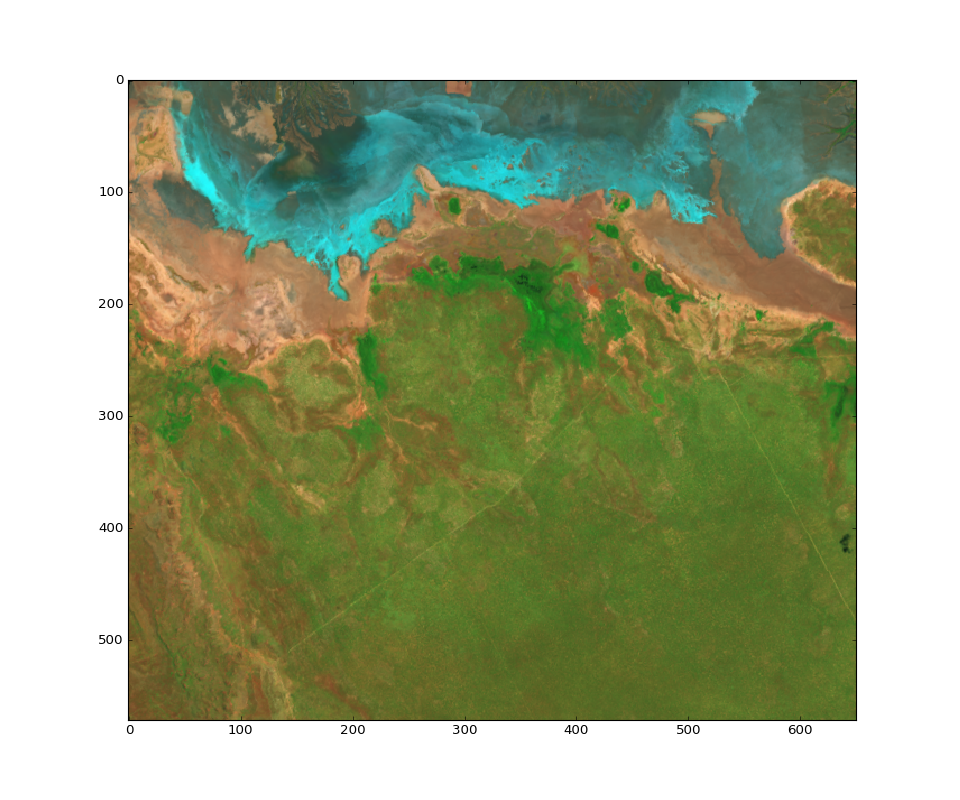

In [33]:
#select time slice of interest
time_slice = 213
rgb = nbar_clean.isel(time =time_slice).to_array(dim='color').sel(color=['swir2', 'nir', 'green']).transpose('y', 'x', 'color')
fake_saturation = 6000
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)
print nbar_clean.time[time_slice].values
fig = plt.figure(figsize =(12,10))
plt.imshow(scaled, interpolation = 'nearest')

In [34]:
#Now plot the NDVI for this time slice

#First define the colour stretchd
ndvi_cmap = mpl.colors.ListedColormap(['darkslategray','#946B33' , '#8F7033' , '#8A7533' , '#857A33', '#808033',
                                      '#7A8533', '#758A33', '#708F33', '#6B9433', '#669933', '#619E33', '#5CA333',
                                      '#57A833', '#52AD33', '#4CB233', '#47B833', '#42BD33', '#3DC233', '#38C733',
                                      '#33CC33', '#30C430', '#2EBD2E', '#2BB52B', '#29AD29', '#26A626', '#249E24', 
                                      '#219621', '#1F8F1F', '#1C871C', '#1A801A', '#177817', '#147014', '#126912',
                                      '#0F610F', '#0D590D', '#0A520A', '#084A08', '#054205', '#033B03', '#003300'])
#Define the colourmap using even breaks in the data

a = all_ndvi_sorted.isel(time = time_slice).values.flatten()

ndvi_bounds = [-1, 0]

p = np.linspace(5,95, 39)

for perc in p:
    ndvi_bounds.append(np.percentile(a, perc))

ndvi_norm = mpl.colors.BoundaryNorm(ndvi_bounds, ndvi_cmap.N)

fig = plt.figure(figsize =(12,10))
ndvi_scene = all_ndvi_sorted.isel(time = time_slice)
imshow(ndvi_scene, cmap = ndvi_cmap, norm = ndvi_norm)


<IPython.core.display.Javascript object>

In [35]:
#Now plot the WETNESS for this time slice

fig = plt.figure(figsize =(12,10))
wetness_scene = all_wetness_sorted.isel(time = time_slice)
imshow(wetness_scene, cmap = 'Blues')

<IPython.core.display.Javascript object>

In [36]:
#Now plot the brightness for this time slice

fig = plt.figure(figsize =(12,10))
brightness_scene = all_brightness_sorted.isel(time = time_slice)
imshow(brightness_scene, cmap = 'inferno')

<IPython.core.display.Javascript object>

In [37]:
#Now plot the greeness for this time slice

fig = plt.figure(figsize =(12,10))
greeness_scene = all_greeness_sorted.isel(time = time_slice)
imshow(greeness_scene, cmap = 'Greens')

<IPython.core.display.Javascript object>

In [38]:
#These functions are needed to write the grids into geotiffs 

#Function below is from https://github.com/data-cube/agdc-v2/blob/develop/datacube/helpers.py

DEFAULT_PROFILE = {
    'blockxsize': 128,
    'blockysize': 128,
    'compress': 'lzw',
    'driver': 'GTiff',
    'interleave': 'band',
    'nodata': 0.0,
    'photometric': 'RGBA',
    'tiled': True}


def write_geotiff(filename, dataset, projected = True, time_index=None, profile_override=None):
    """
    Write an xarray dataset to a geotiff
    :attr bands: ordered list of dataset names
    :attr time_index: time index to write to file
    :attr dataset: xarray dataset containing multiple bands to write to file
    :attr profile_override: option dict, overrides rasterio file creation options.
    """
    profile_override = profile_override or {}

    dtypes = {val.dtype for val in dataset.data_vars.values()}
    assert len(dtypes) == 1  # Check for multiple dtypes

    profile = DEFAULT_PROFILE.copy()
    if projected == True:
        profile.update({'width': dataset.dims['x'],
                        'height': dataset.dims['y'],
                        'affine': dataset.affine,
                        #'crs': dataset.crs.crs_str,
                        'crs': dataset.crs.wkt,
                        'count': len(dataset.data_vars),
                        'dtype': str(dtypes.pop())
                      })
    elif projected == False:
        profile.update({'width': dataset.dims['longitude'],
                        'height': dataset.dims['latitude'],
                        'affine': dataset.affine,
                        #'crs': dataset.crs.crs_str,
                        'crs': dataset.crs.wkt,
                        'count': len(dataset.data_vars),
                        'dtype': str(dtypes.pop())
                      })        
    profile.update(profile_override)

    with rasterio.open(filename, 'w', **profile) as dest:
        for bandnum, data in enumerate(dataset.data_vars.values(), start=1):
            #dest.write(data.isel(time=time_index).data, bandnum)
            print bandnum
            print data
            dest.write(data, bandnum)
            print 'Done'

#This function helps to add the relevant metadata information to a new dataset
def add_ds_info(new_ds, old_ds):
    new_ds.attrs['affine'] = old_ds.affine
    new_ds.attrs['crs'] = old_ds.crs

In [39]:
#If you want to save the NDVI image run this cell

#Find the date to add to output filename
ts = pd.to_datetime(str(nbar_clean.time[time_slice].values))
d = ts.strftime('%Y.%m.%d')
                    
#This is the file path and name. Edit at your own leasure            
outfile = '/home/547/njs547/shapefiles/Keep_River_aoi' + '_' + d + '_' + 'NDVI' + '.tiff'

#We need to convert the data array to a dataset before saving it

ds = ndvi_scene.to_dataset(name = 'NDVI')

add_ds_info(ds, nbar_clean)

#write_geotiff(outfile, ds)


In [40]:
#If you want to save the WETNESS image run this cell

#Find the date to add to output filename
ts = pd.to_datetime(str(nbar_clean.time[time_slice].values))
d = ts.strftime('%Y.%m.%d')
                    
#This is the file path and name. Edit at your own leasure            
outfile = '/home/547/njs547/shapefiles/Keep_River_aoi' + '_' + d + '_' + 'WETNESS' + '.tiff'

#We need to convert the data array to a dataset before saving it

ds = wetness_scene.to_dataset(name = 'WETNESS')

add_ds_info(ds, nbar_clean)

#write_geotiff(outfile, ds)


In [41]:
#If you want to save the BRIGHTNESS image run this cell

#Find the date to add to output filename
ts = pd.to_datetime(str(nbar_clean.time[time_slice].values))
d = ts.strftime('%Y.%m.%d')
                    
#This is the file path and name. Edit at your own leasure            
outfile = '/home/547/njs547/shapefiles/Keep_River_aoi' + '_' + d + '_' + 'BRIGHTNESS' + '.tiff'

#We need to convert the data array to a dataset before saving it

ds = brightness_scene.to_dataset(name = 'BRIGHTNESS')

add_ds_info(ds, nbar_clean)

#write_geotiff(outfile, ds)


In [42]:
#If you want to save the GREENESS image run this cell

#Find the date to add to output filename
ts = pd.to_datetime(str(nbar_clean.time[time_slice].values))
d = ts.strftime('%Y.%m.%d')
                    
#This is the file path and name. Edit at your own leasure            
outfile = '/home/547/njs547/shapefiles/Keep_River_aoi' + '_' + d + '_' + 'GREENESS' + '.tiff'

#We need to convert the data array to a dataset before saving it

ds = greeness_scene.to_dataset(name = 'GREENESS')

add_ds_info(ds, nbar_clean)

#write_geotiff(outfile, ds)


# Time series visualisation

<IPython.core.display.Javascript object>


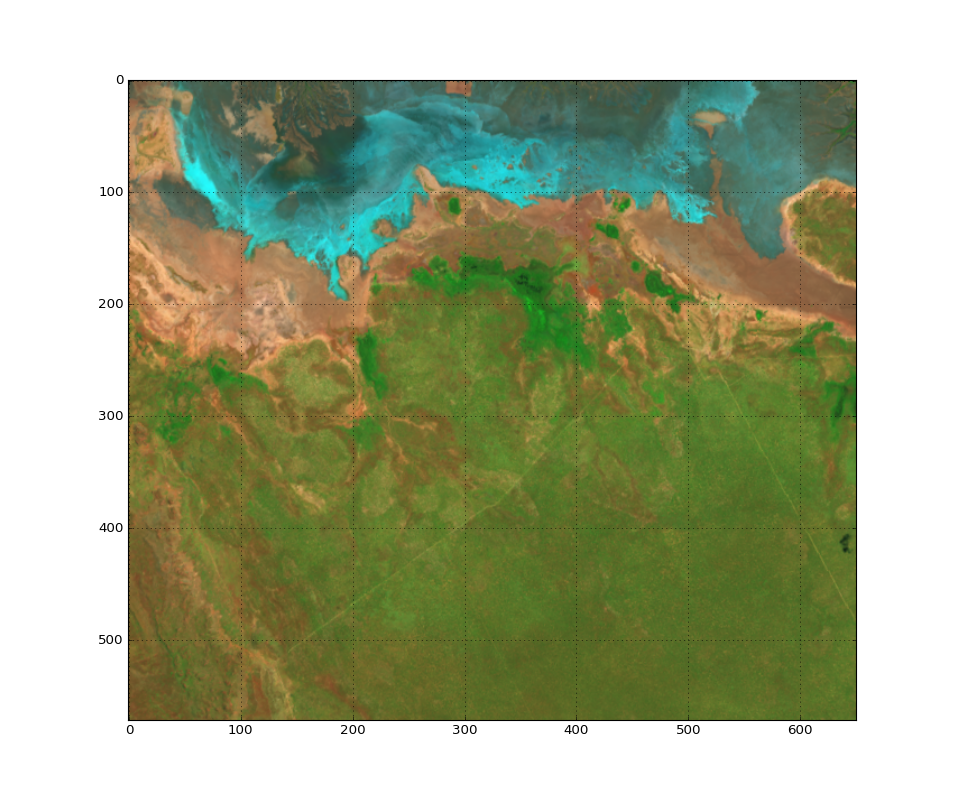

In [45]:
#Click on this image to chose the location for the Hovmoller extraction and to pick the pixel that you want to drill
w = widgets.HTML("Event information appears here when you click on the figure")


def callback(event):
    global x, y
    x, y = int(event.xdata + 0.5), int(event.ydata + 0.5)
    print 'test'
    w.value = 'X: {}, Y: {}'.format(x,y)

fig = plt.figure(figsize =(12,10))
plt.imshow(scaled)

plt.grid(True)
fig.canvas.mpl_connect('button_press_event', callback)

plt.show()
display(w)

In [46]:
# To define x and y click on a point on the map above
x, y

(355, 182)

<IPython.core.display.Javascript object>


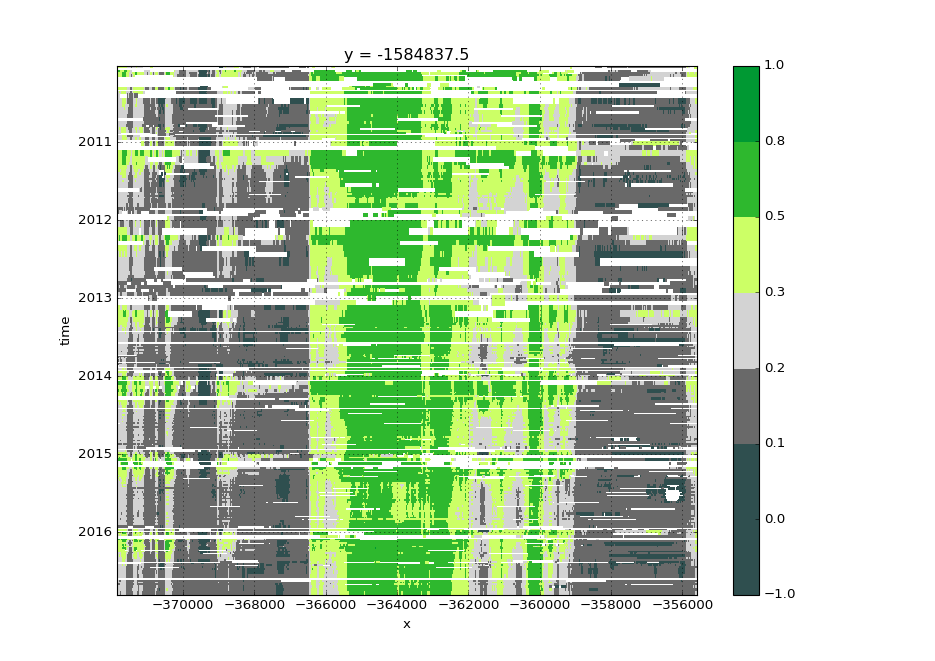

In [47]:
#Use this to select the first location from which to retrieve a time series. 
# The click will be saved as global variable mapx
w = widgets.HTML("Event information appears here when you click on the figure")


def callback(event):
    global mapx, hovtime
    mapx, hovtime = int(event.xdata + 0.5), int(event.ydata + 0.5)
    w.value = 'X: {}, Y: {}'.format(x,y)
    print mapx

#Define colour strecthes    
ndvi_cmap = mpl.colors.ListedColormap(['blue' '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
tss_cmap = mpl.colors.ListedColormap(['navy', 'blue', 'deepskyblue','aquamarine' , 'burlywood' , 'saddlebrown'])
nbr_cmap = mpl.colors.ListedColormap(['darkslategray','dimgray' , 'lightgrey' , '#ccff66' , '#2eb82e', '#009933'])

ndvi_bounds = [-1, 0, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
nbr_bounds = [-1, -0.1, 0, 0.1, 0.2, 0.4, 0.6]
tss_bounds = [0, 10, 20, 50, 80, 100, 150]

tss_norm = mpl.colors.BoundaryNorm(tss_bounds, tss_cmap.N)
ndvi_norm = mpl.colors.BoundaryNorm(ndvi_bounds, ndvi_cmap.N)
nbr_norm = mpl.colors.BoundaryNorm(nbr_bounds, nbr_cmap.N)
fig = plt.figure(figsize=(11.69,8.27))

#To look at the line of latitude extending from your selected point uncomment y = [y] or uncomment
# x = [x] to look at the line of longitude
all_ndvi_sorted.isel(#x=[x],
                     y=[y]
                     ).plot(norm= ndvi_norm, cmap = nbr_cmap, yincrease = False)


plt.grid(True)
fig.canvas.mpl_connect('button_press_event', callback)

plt.show()
display(w)


In [48]:
print mapx
print y

-361658
182


<IPython.core.display.Javascript object>


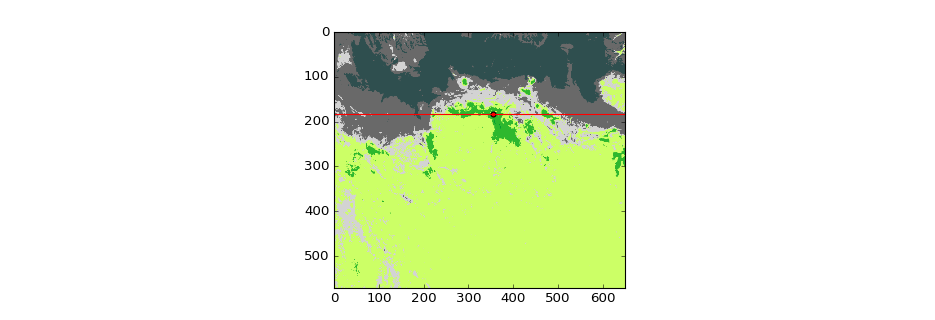

<xarray.DataArray 'time' ()>
numpy.datetime64('2016-10-11T00:00:00.000000000')
Coordinates:
    time     datetime64[ns] 2016-10-11


In [49]:
fig = plt.figure(figsize=(11.69,4))

#Define coordinates of interest
timeactual = all_ndvi_sorted.time[time_slice]

tss_min = 0
tss_max = 2000
plt.scatter(x=[x], y=[y], c='r')

plt.plot([0, all_ndvi_sorted.shape[2]], [y,y], 'r')
#plt.plot([xdim,xdim], [0, all_ndvi_sorted.shape[1]], 'aquamarine')



imshow(all_ndvi_sorted.isel(time = time_slice), cmap = nbr_cmap, norm = ndvi_norm)
#imshow(all_nbr_sorted.isel(time = time_slice), cmap = nbr_cmap, norm = nbr_norm)


print timeactual.astype(datetime64)

In [50]:
#this converts the map x coordinate into image x coordinates
~nbar_clean.affine * (mapx, -1456812)
image_coords = ~nbar_clean.affine * (mapx, -1456812)
imagex = int(image_coords[0])
imagex


407

<IPython.core.display.Javascript object>


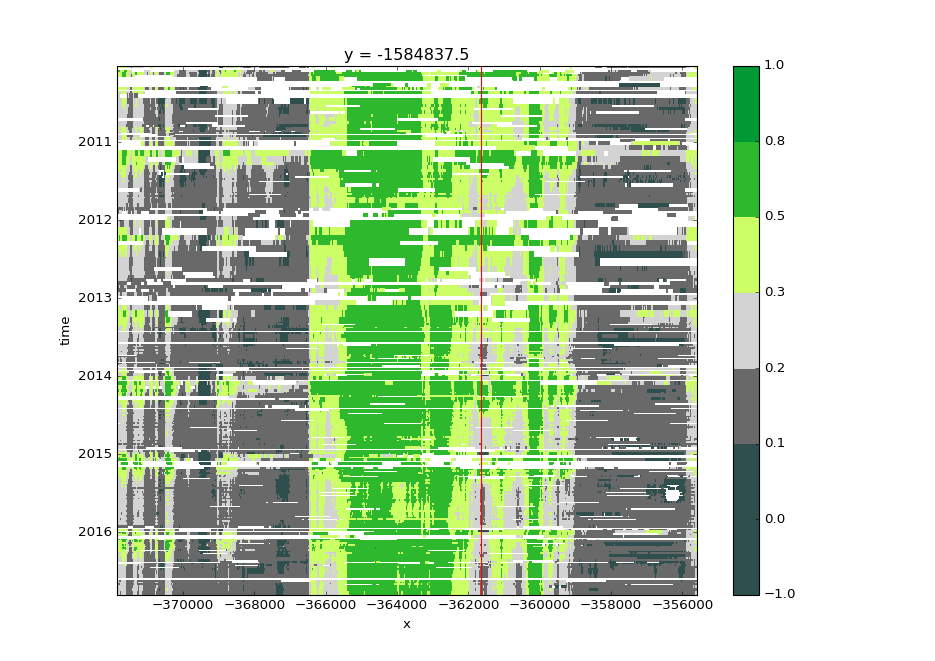

In [51]:
#This will show the location of the time series

fig = plt.figure(figsize=(11.69,8.27))


all_ndvi_sorted.isel(#x=[xdim],
                     y=[y]
                     ).plot(norm= ndvi_norm, cmap = nbr_cmap, yincrease = False)

plt.plot([mapx, mapx],[start_of_epoch, end_of_epoch], 'r')


## Pixel drill

<IPython.core.display.Javascript object>


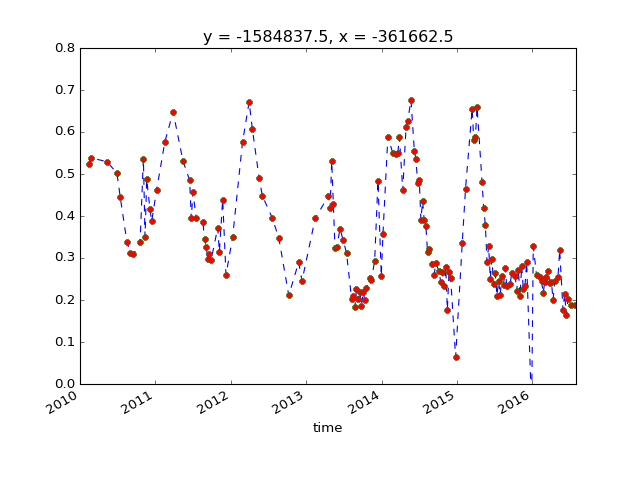

['2010-01-01', '2016-7-30', 0, 0.8]

In [53]:
#Use this plot to visualise TSS time series and select the image that corresponds with a point in the time series
def callback(event):
    global time_int, devent
    devent = event
    time_int = event.xdata
    #time_int_ = time_int.astype(datetime64[D])
    w.value = 'time_int: {}'.format(time_int)

fig = plt.figure()


fig.canvas.mpl_connect('button_press_event', callback)

plt.show()
display(w)

firstyear = '2010-01-01'
lastyear = '2016-7-30'
all_ndvi_sorted.isel(x=[imagex],y=[y]).dropna('time', how = 'any').plot(linestyle= '--', c= 'b', marker = '8', mec = 'g', mfc ='r')

plt.axis([firstyear , lastyear ,0, 0.8])

# Grid statistics

In [54]:
# DEfine functions
def month_cut(data, month_1, month_2):

    if data.dims[0] == 'time':
        sliced_xr = list(data.groupby('time.month'))[monthDict[month_1]:monthDict[month_2] + 1]
    elif data.dims[0] == 'month':
        sliced_xr = list(data.groupby('month'))[monthDict[month_1]:monthDict[month_2] + 1]
    
    #Concatenate all the arrays into one xarray
    split_xr = sliced_xr[0][1]

    
    for i in range(int(monthDict[month_2]) - int(monthDict[month_1])):
        split_xr = xr.concat([split_xr, sliced_xr[i+1][1]], dim = data.dims[0])
                     
    return split_xr

def xr_stdev(input_array):
    ylen = len(input_array.y)
    xlen = len(input_array.x)
    from itertools import product
    coordinates = product(range(ylen), range(xlen))

    std = np.zeros((ylen, xlen))

    for y, x in coordinates:
        val = input_array.isel(x = x, y = y)
        val = val[~np.isnan(val)]
        std[y, x] = np.std(val)

    #Get coordinates from the original xarray
    lat  = input_array.coords['y']
    long = input_array.coords['x']   
    # Write arrays into a x-array
    std_xr = xr.DataArray(std, coords = [lat, long], dims = ['y', 'x'])
    return std_xr

def xr_percentile(input_array, percentile = 50):
    ylen = len(input_array.y)
    xlen = len(input_array.x)
    from itertools import product
    coordinates = product(range(ylen), range(xlen))

    perc = np.zeros((ylen, xlen))

    for y, x in coordinates:
        val = input_array.isel(x = x, y = y)
        val = val[~np.isnan(val)]
        perc[y, x] = np.percentile(val, percentile)

    #Get coordinates from the original xarray
    lat  = input_array.coords['y']
    long = input_array.coords['x']   
    # Write arrays into a x-array
    perc_xr = xr.DataArray(perc, coords = [lat, long], dims = ['y', 'x'])
    return perc_xr

In [55]:
# Calculate some basic statistics

#mean
mean_ndvi = all_ndvi_sorted.mean(dim = 'time')
mean_wetness = all_wetness_sorted.mean(dim = 'time')
mean_brightness = all_brightness_sorted.mean(dim = 'time')


In [56]:
# 20th percentile. Note this is non vectorised so the function is slow on large datasets

p20_ndvi = xr_percentile(all_ndvi_sorted,20)
p20_wetness = xr_percentile(all_wetness_sorted,20)
p20_brightness = xr_percentile(all_wetness_sorted,20)

In [57]:
#key monthly mean
march_ndvi = month_cut(all_ndvi_sorted, 'March', 'March').mean(dim = 'time')
march_wetness = month_cut(all_wetness_sorted, 'March', 'March').mean(dim = 'time')
march_brightness = month_cut(all_ndvi_sorted, 'March', 'March').mean(dim = 'time')

In [58]:
#A few means from a number of averaged

buildup_ndvi = month_cut(all_ndvi_sorted, 'September', 'October').mean(dim = 'time')
buildup_wetness = month_cut(all_wetness_sorted, 'September', 'October').mean(dim = 'time')
buildup_brightness = month_cut(all_ndvi_sorted, 'September', 'October').mean(dim = 'time')

In [59]:
#standard deviation

stdev_ndvi = xr_stdev(all_ndvi_sorted)
stdev_wetness = xr_stdev(all_wetness_sorted)
stdev_brightness = xr_stdev(all_brightness_sorted)

# Linear regression

In [60]:
#Define important functions and dictionaries
# See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html



from scipy import stats


#This function applies a linear regression to a grid over a set time interval
def linear_regression_grid(input_array, mask_no_trend = True, NDVI = False):
    '''
    This function applies a linear regression to a grid over a set time interval by looping through lat and lon 
    and calculating the linear regression through time for each pixel.
    '''

    ylen = len(input_array.y)
    xlen = len(input_array.x)
    from itertools import product
    coordinates = product(range(ylen), range(xlen))

    slopes = np.zeros((ylen, xlen))
    p_values = np.zeros((ylen, xlen))
    print('Slope shape is ', slopes.shape)

    for y, x in coordinates:
        val = input_array.isel(x = x, y = y)
        # If analysing NDVI data replace negative numbers which are spurious for NDVI with nans
        if NDVI == True:
            val[val<0] = np.nan

            # Check that we have at least three values to perform our linear regression on
            if np.count_nonzero(~np.isnan(val)) > 3:
                if str(val.dims[0]) == 'month':
                    slopes[y, x], intercept, r_sq, p_values[y, x], std_err = stats.linregress(val.month,val)
                elif str(val.dims[0]) == 'year':
                    slopes[y, x], intercept, r_sq, p_values[y, x], std_err = stats.linregress(val.year,val)
            else:
                slopes[y, x] = np.nan
                intercept = np.nan
                r_sq = np.nan
                p_values[y, x] = np.nan
        else:
            if str(val.dims[0]) == 'month':
                slopes[y, x], intercept, r_sq, p_values[y, x], std_err = stats.linregress(val.month,val)
            elif str(val.dims[0]) == 'year':
                slopes[y, x], intercept, r_sq, p_values[y, x], std_err = stats.linregress(val.year,val)

    #Get coordinates from the original xarray
    lat  = input_array.coords['y']
    long = input_array.coords['x']
    #Mask out values with insignificant trends (ie. p-value > 0.05) if user wants
    if mask_no_trend == True:
        slopes[p_values>0.05]=np.nan        
    # Write arrays into a x-array
    slope_xr = xr.DataArray(slopes, coords = [lat, long], dims = ['y', 'x'])
    p_val_xr = xr.DataArray(p_values, coords = [lat, long], dims = ['y', 'x']) 
    return slope_xr, p_val_xr



<IPython.core.display.Javascript object>


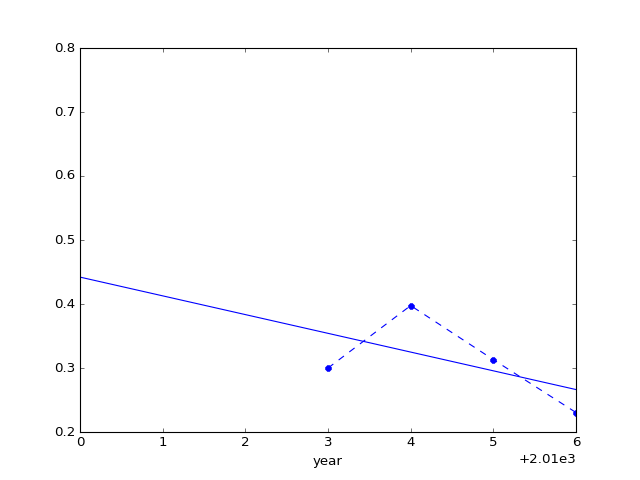

slope is -0.0292860394534
r-squared value is 0.30411381927


In [61]:
#Run a linear regression on the yearly averaged time series
# This can help you define time intervals for the period below
fig = plt.figure()

#Define starting and ending dates
year_1 = '2012-1-1'
year_2 = '2016-12-31'

#Average using the groupby function and find the average using the inbuilt .mean() function
yearly_average = all_ndvi_sorted.isel(x=[imagex],y=[y]).astype(float).groupby('time.year').mean()

#Cut the data into the time interval of interest
yearly_average_cut = yearly_average.loc[year_1:year_2]


#Plot the data
yearly_average_cut.plot(linestyle= '--', c= 'b', marker = '8', mec = 'b', mfc ='b')


#Add a linear regression to the plot

slope, intercept, r_value, p_value, stderr = stats.linregress(yearly_average_cut.year.values,yearly_average_cut.values)
r_squared = r_value**2

#Find the years
years = yearly_average.year.values

#For plotting the linear trend, apply 'y = mx + c' tot he year
y1 = [(slope*n + intercept) for n in years]

plt.plot(yearly_average.year.values, y1)

plt.axis([years[0], years[-1] ,0.2, 0.8])

print 'slope is ' + str(slope)
print 'r-squared value is ' + str(r_squared)



('Slope shape is ', (572, 650))


<IPython.core.display.Javascript object>


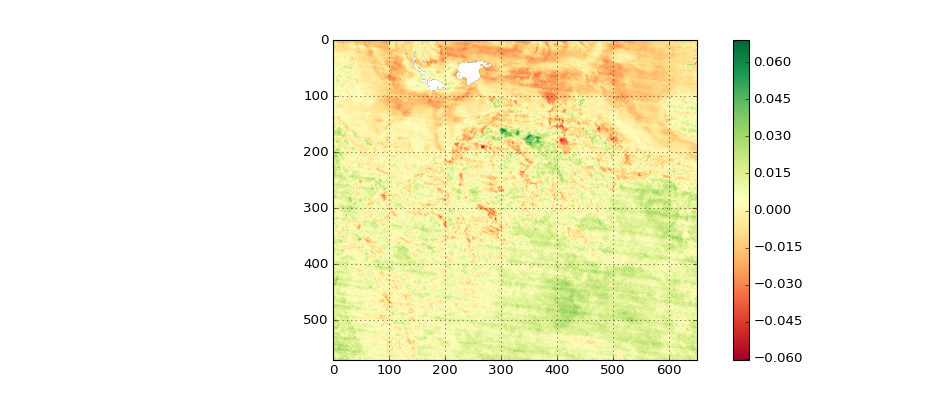

In [62]:
#Run a linear regression on yearly averaged data on the entire grid for a set time interval
    
#Run the above function
time_1 = '2012-01-01'
time_2 = '2016-12-31'

#Prepare the data by cutting it for the  time interval of interest and groubing then averaging it on a yearly basis
cut_data = all_ndvi_sorted.loc[time_1:time_2]

ave = cut_data.groupby('time.year').mean(dim='time')   


# Run the linear regression on the grid. This function masks slopes that are statistically insignficant if
# mask_no_tred = True. If you don't want the mask, simply change it to equal False (capitals are important)
slope_xr, p_val_xr = linear_regression_grid(ave, mask_no_trend = False, NDVI = True)

fig = plt.figure(figsize =(11.69,5))

#To change the colour map change cmap.RdYlGn to a stretch of your choice (see. 
# http://matplotlib.org/examples/color/colormaps_reference.html for choices)
plt.imshow(slope_xr,cmap = cm.RdYlGn)

plt.grid(True)
plt.colorbar()

plt.show()


Next we run yearly linear regression on the yearly trend except this time we only include certain months of the year. This enables us to for example only use dry months (eg. June to October in Northern Australia) to look for trends that may pertain to the groundwater signal. A good way to think of this is that all data from each year are grouped and then the linear regression is run across the years.

Note that at present this only works on calendar years (solution to be developed)

('Slope shape is ', (572, 650))


/g/data2/v10/public/modules/agdc-py2-env/20161201/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


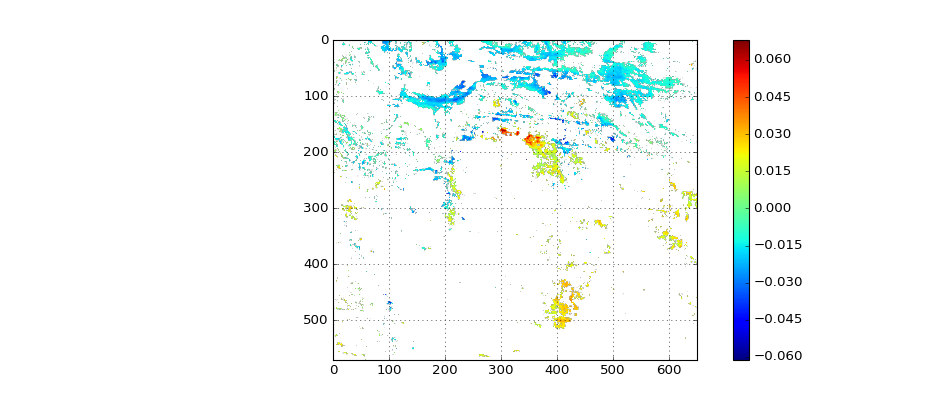

In [63]:
#Define time interval and months range
time_1 = '2012-01-01'
time_2 = '2016-12-31'
month_1 = 'April'
#f you want to only look at one month then simply make month_1 equal to month_2
month_2 = 'October'

cut_data = all_ndvi_sorted.loc[time_1:time_2]

#Split pull out all of the months of interest using the function defined above
split_data = month_cut(cut_data, month_1, month_2)

yearly_ave = split_data.groupby('time.year').mean(dim='time')

#Now plot a grid for this data

slope_xr, p_val_xr = linear_regression_grid(yearly_ave, mask_no_trend = True, NDVI = True)

fig = plt.figure(figsize =(11.69,5))
plt.imshow(slope_xr)

plt.grid(True)
plt.colorbar()

plt.show()

This next linear regression is looking at the change throughout the year. A good way to think of it is that all data from a particular month (eg. October) are taken from all the years in the time interval and averaged. We then run the linear regression across the months in this interval. This gives us a trend from within a year (such as the drying trend in the dry season.

Note that at present the months cannot span across years (for future development).

('Slope shape is ', (572, 650))


<IPython.core.display.Javascript object>


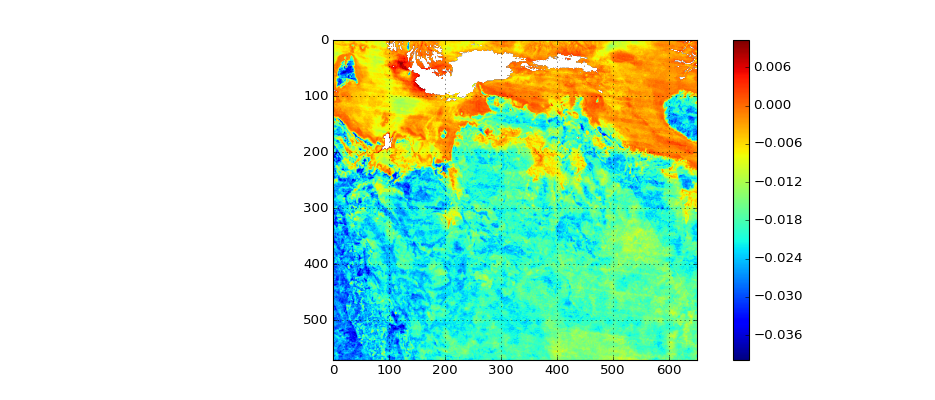

In [64]:
#Finally we plot the regression for averaged daily or monthly data with a year(s) (eg. the May to October trend)
# If multiple years are chosen then the monthly data is averaged over multiple years (eg all October data over time period
# is averaged)

#Define time interval and months range
time_1 = '2012-01-01'
time_2 = '2016-12-31'
month_1 = 'April'
#You need at least 3 months to get a meaningful lilnear regression slope
month_2 = 'October'


cut_data = all_ndvi_sorted.loc[time_1:time_2]

averaged_data = cut_data.groupby('time.month').mean(dim='time')


#Now plot a grid for this data

month_cut(averaged_data, 'April', 'October')

slope_xr_ndvi, p_val_xr_ndvi = linear_regression_grid(averaged_data, mask_no_trend = False, NDVI = True)

fig = plt.figure(figsize =(11.69,5))
plt.imshow(slope_xr_ndvi)

plt.grid(True)
plt.colorbar()

plt.show()

('Slope shape is ', (572, 650))


<IPython.core.display.Javascript object>


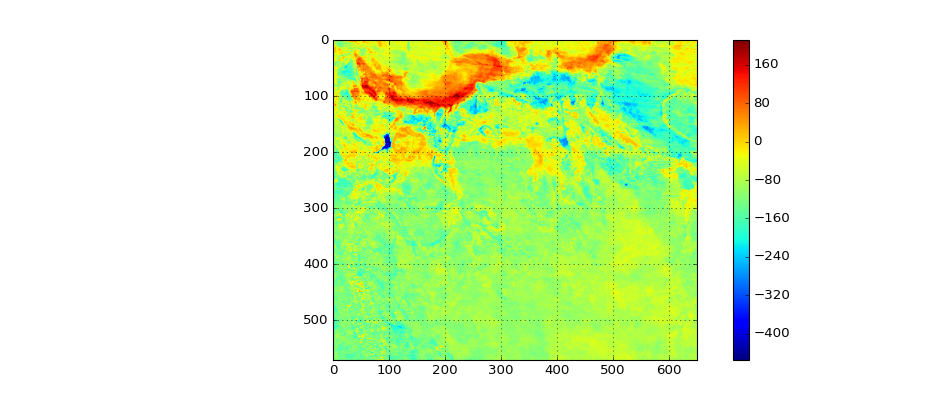

In [65]:
#These can equaly be done on the other indices by jsut replacing the input data

#Define time interval and months range
time_1 = '2012-01-01'
time_2 = '2016-12-31'
month_1 = 'April'
#You need at least 3 months to get a meaningful lilnear regression slope
month_2 = 'October'


cut_data = all_wetness_sorted.loc[time_1:time_2]

averaged_data = cut_data.groupby('time.month').mean(dim='time')

averaged_data = month_cut(averaged_data, month_1, month_2)

#Now plot a grid for this data

slope_xr_wetness, p_val_xr_wetness = linear_regression_grid(averaged_data, mask_no_trend = False, NDVI = False)

fig = plt.figure(figsize =(11.69,5))
plt.imshow(slope_xr_wetness)

plt.grid(True)
plt.colorbar()

plt.show()

# Saving outputs

In [66]:
#To save the slope_xr x-array we first convert the data array to a dataset

ds = slope_xr.to_dataset(name = 'Slope')

add_ds_info(ds, nbar_clean)



In [67]:
#Write the files out into a tif file for viewing in GIS

# You may need to adjust the default_profile values so that blockysize is not larger than the xr spatial dimensions

outfile = '/home/547/njs547/shapefiles/Keep_River_trend.tiff'

#write_geotiff(outfile, ds)




# DEM

In [68]:
ndvi_scene.crs

'PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3577"]]'

<IPython.core.display.Javascript object>


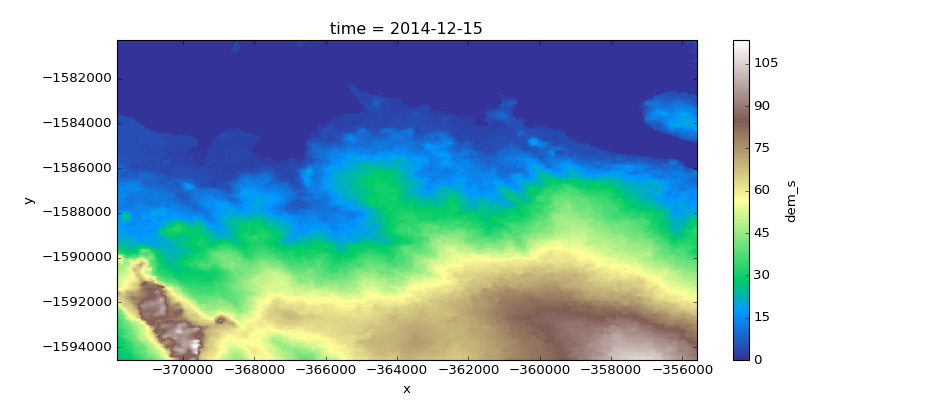

<xarray.DataArray 'dem_h' (time: 1, y: 572, x: 650)>
array([[[ -3.40282347e+38,  -3.40282347e+38,  -3.40282347e+38, ...,
          -1.19534099e+00,  -1.19534099e+00,   5.93446121e-02],
        [ -3.40282347e+38,  -3.40282347e+38,  -3.40282347e+38, ...,
          -1.19534099e+00,  -2.17350698e+00,  -1.25335002e+00],
        [ -3.40282347e+38,  -3.40282347e+38,  -3.40282347e+38, ...,
          -2.17350698e+00,  -2.17350698e+00,  -1.25335002e+00],
        ..., 
        [  2.52423706e+01,   2.53400669e+01,   2.54975929e+01, ...,
           9.12706833e+01,   9.12706833e+01,   9.11109009e+01],
        [  2.52423706e+01,   2.53400669e+01,   2.54975929e+01, ...,
           9.12706833e+01,   9.12706833e+01,   9.11109009e+01],
        [  2.50846653e+01,   2.51547089e+01,   2.52890491e+01, ...,
           9.20356827e+01,   9.16709366e+01,   9.14820023e+01]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2014-12-15
  * y        (y) float64 -1.58e+06 -1.58e+06 -1.58e+06 -1.58e+06 

In [69]:
#WE get the DEM for our modelling domain
    
dc_dem = datacube.Datacube(app='get dsm')
elev = dc.load(product = 'srtm_dem1sv1_0', group_by='solar_day', output_crs='EPSG:3577', resolution=(-25,25), **query)

fig = plt.figure(figsize =(11.69,5))
elev.dem_s.plot(cmap = cm.terrain)

print elev.dem_h

In [70]:
#SAve the output if you want


ds = elev.dem_s.to_dataset(name = 'DEM')

add_ds_info(ds, elev.dem_s)


dem_outfile = '/home/547/njs547/shapefiles/Keep_dem.tiff'

#try:
    #write_geotiff(dem_outfile, ds)

#except ValueError:
    #print 'There is already a file by this name. Please give the output a unique name or or delete the previous version.' 


    # Principle component analysis

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

shapes = np.shape(mean_ndvi.values)

#Choose the datasets that are most useful for your purpose
input_grids = [mean_ndvi, mean_wetness, mean_brightness, elev.dem_s, slope_xr_ndvi, slope_xr_wetness,
               march_ndvi,march_wetness, march_brightness, buildup_ndvi, buildup_wetness, buildup_brightness, 
               p20_ndvi, p20_wetness, p20_brightness, stdev_ndvi, stdev_wetness, stdev_brightness]

input_arrays = []

#Iterate through the input data  and prepare them for inputting into PCA
# Unsure about what are samples and what are features. Seems inconsistent with the online api suggestions

for i, item in enumerate(input_grids):
    a = item.values.flatten()
    # Change nulls to zero
    a[np.isnan(a) == True] = 0
    if i == 0:
        input_arrays = np.array(a)
    else:
        input_arrays = np.vstack((input_arrays, a))

#Scale each unit vector

X = scale(input_arrays)

print np.shape(X)

n_components = len(input_grids)

pca = PCA(n_components=n_components)

pca.fit(X)

print pca.explained_variance_ratio_

PC_grids = {}

print np.shape(pca.components_)

#Reshape the principle components into the original grid shape and add them to a dictionary called PCs
for i in range(n_components):
    PC_grids['PC' + str(i+1)] = pca.components_[i].reshape(shapes) 

(18, 371800)
[  9.70206914e-01   1.97132689e-02   8.18118149e-03   1.17705701e-03
   3.62530361e-04   2.28183753e-04   8.98839124e-05   2.67817364e-05
   1.41979789e-05   5.99450088e-10   1.07885637e-10   1.28314958e-11
   2.44190231e-12   1.33705025e-12   3.58593675e-29   1.75195710e-32
   1.50492751e-38   2.02733521e-40]
(18, 371800)


<IPython.core.display.Javascript object>


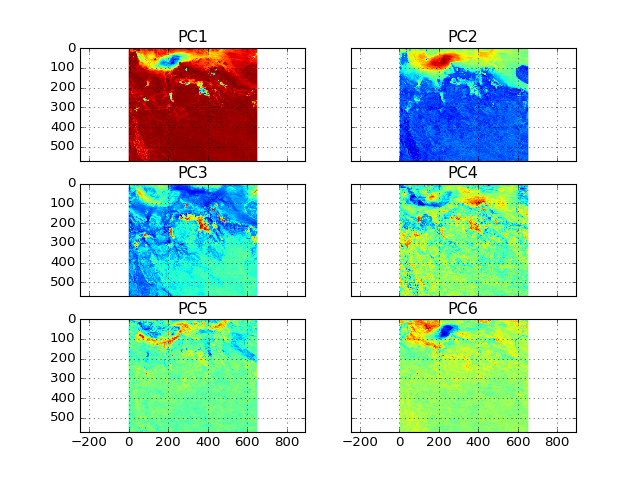

In [72]:

#Now we want to reshape the array back to its original and plot the gri
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')

ax1.imshow(PC_grids['PC1'])
ax1.grid(True)
ax1.set_title('PC1')

ax2.imshow(PC_grids['PC2'])
ax2.grid(True)
ax2.set_title('PC2')

ax3.imshow(PC_grids['PC3'])
ax3.grid(True)
ax3.set_title('PC3')

ax4.imshow(PC_grids['PC4'])
ax4.grid(True)
ax4.set_title('PC4')

ax5.imshow(PC_grids['PC5'])
ax5.grid(True)
ax5.set_title('PC5')

ax6.imshow(PC_grids['PC6'])
ax6.grid(True)
ax6.set_title('PC6')

plt.show()

In [97]:
# Now we try to cluster the components and datasets

from sklearn.cluster import KMeans

components2include = 6

input_arrays = []

#Iterate through the input data  and prepare them for inputting into PCA
# Unsure about what are smaples and what are features. Seems inconsistent with kmeans clustering
for i, item in enumerate(input_grids):
    a = item.values.flatten()
    # Change nulls to zero
    a[np.isnan(a) == True] = 0
    if i == 0:
        input_arrays = np.array(a)
    else:
        input_arrays = np.vstack((input_arrays, a))

for i in range(components2include):
    a = PC_grids['PC' + str(i+1)].flatten()
    input_arrays = np.vstack((input_arrays, a))

X = input_arrays.transpose()

X = scale(X)

kmeans = KMeans(n_clusters=8,init='k-means++', max_iter = 800).fit(X)

# Find the labels 
labels = kmeans.labels_

labels = labels.reshape(shapes)


 

<IPython.core.display.Javascript object>


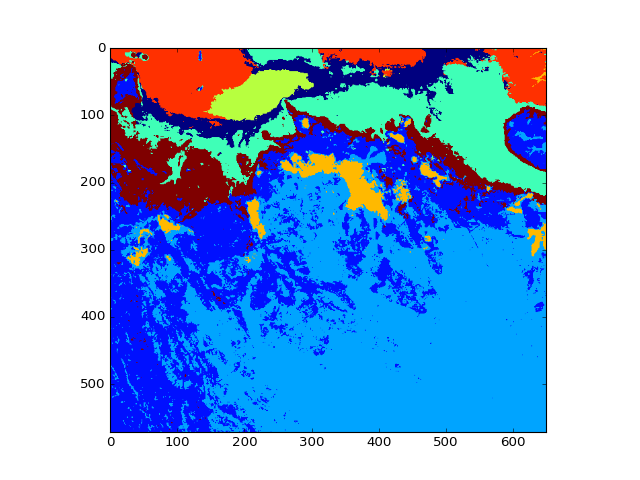

In [98]:
fig = plt.figure(figsize =(8,8))
plt.imshow(labels)
plt.show()

<IPython.core.display.Javascript object>


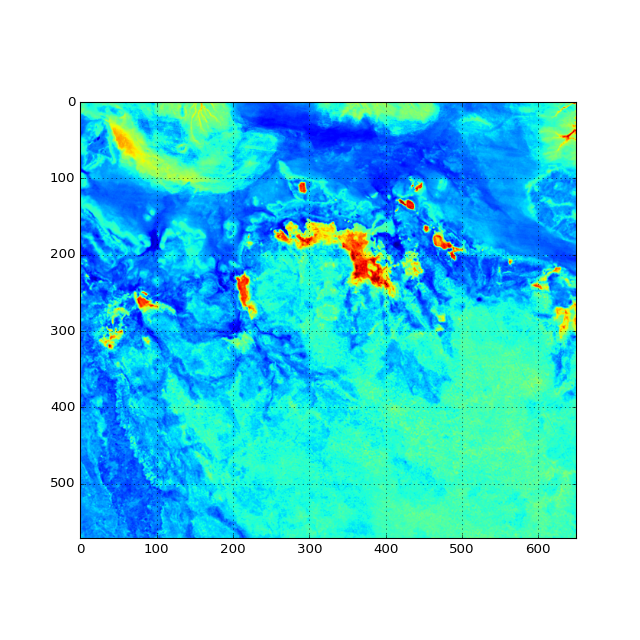

In [95]:
fig = plt.figure(figsize =(8,8))
plt.imshow(PC_grids['PC3'])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


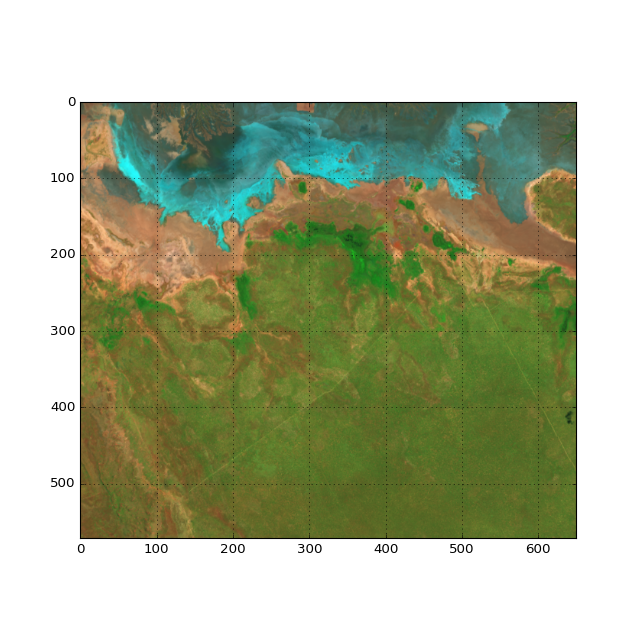

In [96]:
fig = plt.figure(figsize =(8,8))
plt.imshow(scaled)
plt.grid(True)
plt.show()